# Paris housing

Dataset: https://www.kaggle.com/aleshagavrilov/parishousing/version/1

### Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

### Reading dataset

In [2]:
dataset = pd.read_csv('ParisHousing.csv')
dataset.head()

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0,75523,three,63,9373,3,8,2005,False,True,4313,9005,956,False,7,7559081.5,Basic,has pool and no yard
1,1,80771,thirty-nine,98,39381,8,6,2015,True,False,3653,2436,128,True,2,8085989.5,Luxury,has pool and has yard
2,2,55712,fifty-eight,19,34457,6,8,2021,False,False,2937,8852,135,True,9,5574642.1,Basic,has pool and no yard
3,3,32316,forty-seven,6,27939,10,4,2012,False,True,659,7141,359,False,3,3232561.2,Basic,no pool and no yard
4,4,70429,nineteen,90,38045,3,7,1990,True,False,8435,2429,292,True,4,7055052.0,Luxury,has pool and has yard


In [3]:
dataset.shape

(10000, 18)

## Data processing

### Checking missing data

In [4]:
missing = dataset.isna()
missing.sum()

Unnamed: 0           0
squareMeters         0
numberOfRooms        0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
PoolAndYard          0
dtype: int64

### Removing duplicates

In [5]:
dups = dataset.duplicated()
dropped = dataset.drop_duplicates()
dropped.shape

(10000, 18)

### Transformation dataset

In [6]:
# From True and False to 1 and 0
dataset['isNewBuilt'] = dataset['isNewBuilt'].astype(int)
dataset['hasStormProtector'] = dataset['hasStormProtector'].astype(int)
dataset['hasStorageRoom'] = dataset['hasStorageRoom'].astype(int)

dataset['category'] = [1 if c=='Basic' else 0 for c in dataset.category]

dataset.head()

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0,75523,three,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,1,has pool and no yard
1,1,80771,thirty-nine,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,0,has pool and has yard
2,2,55712,fifty-eight,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,1,has pool and no yard
3,3,32316,forty-seven,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,1,no pool and no yard
4,4,70429,nineteen,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,0,has pool and has yard


In [7]:
label_encoder = LabelEncoder()
dataset["PoolAndYard"] = label_encoder.fit_transform(dataset["PoolAndYard"])

dataset.head()

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0,75523,three,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,1,1
1,1,80771,thirty-nine,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,0,0
2,2,55712,fifty-eight,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,1,1
3,3,32316,forty-seven,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,1,3
4,4,70429,nineteen,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,0,0


In [8]:
dict = {
    "one" : 1,
    "two" : 2,
    "three" : 3,
    "four" : 4,
    "five" : 5,
    "six" : 6,
    "seven" : 7,
    "eight" : 8,
    "nine" : 9,
    "ten" : 10,
    "eleven" : 11,
    "twelve" : 12,
    "thirteen" : 13,
    "fourteen" : 14,
    "fifteen" : 15,
    "sixteen" : 16,
    "seventeen" : 17,
    "eighteen" : 18,
    "nineteen" : 19,
    "twenty" : 20,
    "thirty" : 30,
    "forty" : 40,
    "fifty" : 50,
    "sixty" : 60,
    "seventy" : 70,
    "eighty" : 80,
    "ninety" : 90,
    "one hundred" : 100
}

for i in range(dataset.shape[0]) :
    string_value = dataset['numberOfRooms'][i]
    value = 0
    if "-" in string_value :
        substrings = string_value.split("-")
        for string in substrings :
            value += dict[string]
    else:
        value = dict[string_value]
    
    dataset.loc[i, 'numberOfRooms'] = value

dataset['numberOfRooms'] = dataset.numberOfRooms.astype(int)
dataset.head()

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0,75523,3,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,1,1
1,1,80771,39,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,0,0
2,2,55712,58,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,1,1
3,3,32316,47,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,1,3
4,4,70429,19,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,0,0


### Remove unnecessary columns

In [9]:
dataset = dataset.drop('Unnamed: 0', axis=1)
dataset = dataset.drop('basement', axis=1)
dataset = dataset.drop('attic', axis=1)
dataset = dataset.drop('garage', axis=1)

dataset.head()

,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,75523,3,63,9373,3,8,2005,0,1,0,7,7559081.5,1,1
1,80771,39,98,39381,8,6,2015,1,0,1,2,8085989.5,0,0
2,55712,58,19,34457,6,8,2021,0,0,1,9,5574642.1,1,1
3,32316,47,6,27939,10,4,2012,0,1,0,3,3232561.2,1,3
4,70429,19,90,38045,3,7,1990,1,0,1,4,7055052.0,0,0


In [10]:
dataset.shape

(10000, 14)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int32  
 2   floors             10000 non-null  int64  
 3   cityCode           10000 non-null  int64  
 4   cityPartRange      10000 non-null  int64  
 5   numPrevOwners      10000 non-null  int64  
 6   made               10000 non-null  int64  
 7   isNewBuilt         10000 non-null  int32  
 8   hasStormProtector  10000 non-null  int32  
 9   hasStorageRoom     10000 non-null  int32  
 10  hasGuestRoom       10000 non-null  int64  
 11  price              10000 non-null  float64
 12  category           10000 non-null  int64  
 13  PoolAndYard        10000 non-null  int32  
dtypes: float64(1), int32(5), int64(8)
memory usage: 898.6 KB


# Descriptive statistics

In [12]:
dataset.describe(include='all')

,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000
mean,49870.13120,50.358400,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,0.503000,4.99460,4.993448e+06,0.873500,1.497700
std,28774.37535,28.816696,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,0.500016,3.17641,2.877424e+06,0.332429,1.124954
min,89.00000,1.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,0.00000,1.031350e+04,0.000000,0.000000
25%,25098.50000,25.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,0.000000,2.00000,2.516402e+06,1.000000,0.000000
50%,50105.50000,50.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,1.000000,5.00000,5.016180e+06,1.000000,2.000000
75%,74609.75000,75.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,1.000000,8.00000,7.469092e+06,1.000000,3.000000
max,99999.00000,100.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,1.000000,10.00000,1.000677e+07,1.000000,3.000000


In [13]:
dataset.median()

squareMeters           50105.5
numberOfRooms             50.0
floors                    50.0
cityCode               50693.0
cityPartRange              5.0
numPrevOwners              5.0
made                    2005.5
isNewBuilt                 0.0
hasStormProtector          0.0
hasStorageRoom             1.0
hasGuestRoom               5.0
price                5016180.3
category                   1.0
PoolAndYard                2.0
dtype: float64

## Handling highly correlated features

['price']


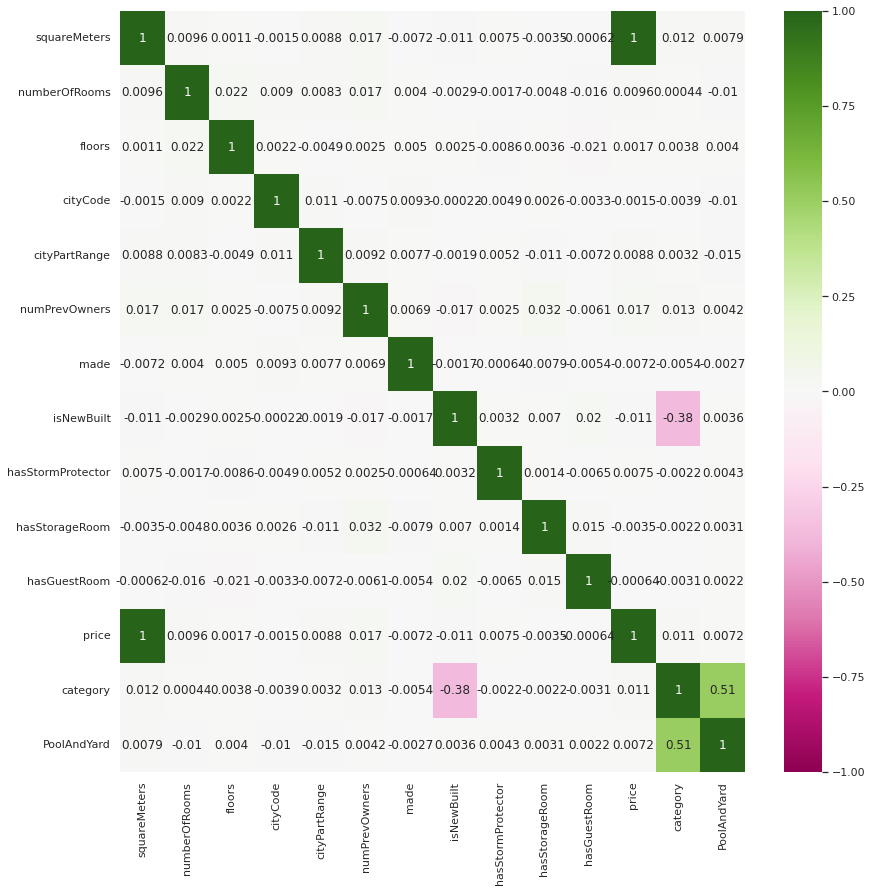

In [14]:
corr = dataset.corr()

sn.set(rc = {'figure.figsize':(14, 14)})
sn.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, cmap="PiYG")

upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

sn.reset_orig()

In [15]:
dataset.drop('price', axis=1, inplace=True)

dataset.head()

,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,hasStorageRoom,hasGuestRoom,category,PoolAndYard
0,75523,3,63,9373,3,8,2005,0,1,0,7,1,1
1,80771,39,98,39381,8,6,2015,1,0,1,2,0,0
2,55712,58,19,34457,6,8,2021,0,0,1,9,1,1
3,32316,47,6,27939,10,4,2012,0,1,0,3,1,3
4,70429,19,90,38045,3,7,1990,1,0,1,4,0,0


array([[<AxesSubplot:title={'center':'squareMeters'}>,
        <AxesSubplot:title={'center':'numberOfRooms'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'cityCode'}>],
       [<AxesSubplot:title={'center':'cityPartRange'}>,
        <AxesSubplot:title={'center':'numPrevOwners'}>,
        <AxesSubplot:title={'center':'made'}>,
        <AxesSubplot:title={'center':'isNewBuilt'}>],
       [<AxesSubplot:title={'center':'hasStormProtector'}>,
        <AxesSubplot:title={'center':'hasStorageRoom'}>,
        <AxesSubplot:title={'center':'hasGuestRoom'}>,
        <AxesSubplot:title={'center':'category'}>],
       [<AxesSubplot:title={'center':'PoolAndYard'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

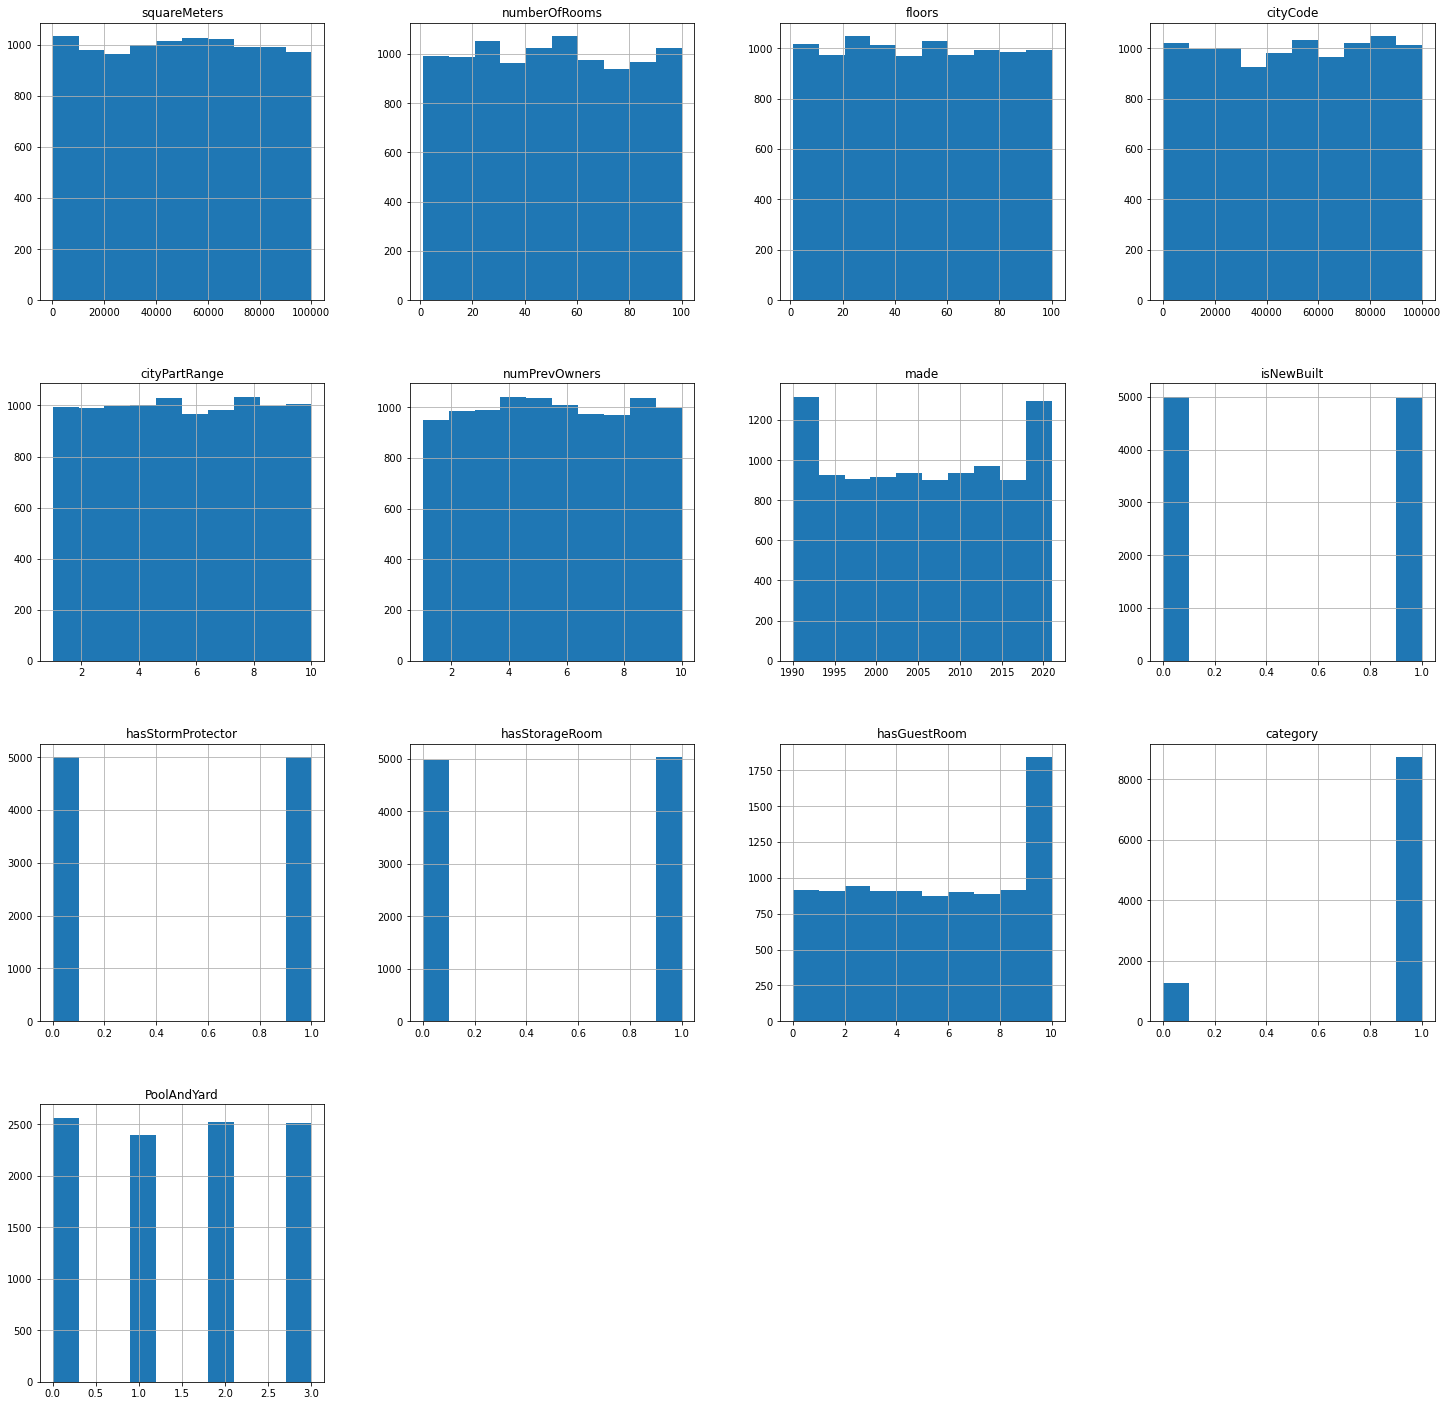

In [16]:
dataset.hist(figsize = (25,25))

# Detecting outliers

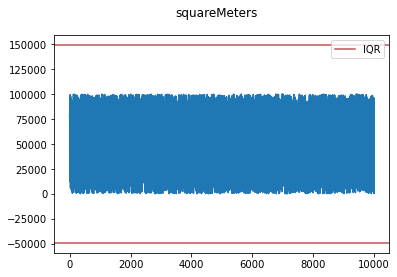

(array([], dtype=int64),)
Empty DataFrame
Columns: [squareMeters, numberOfRooms, floors, cityCode, cityPartRange, numPrevOwners, made, isNewBuilt, hasStormProtector, hasStorageRoom, hasGuestRoom, category, PoolAndYard]
Index: []
-------------------------------------------------


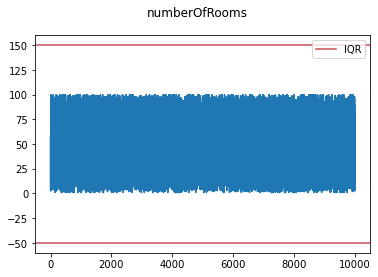

(array([], dtype=int64),)
Empty DataFrame
Columns: [squareMeters, numberOfRooms, floors, cityCode, cityPartRange, numPrevOwners, made, isNewBuilt, hasStormProtector, hasStorageRoom, hasGuestRoom, category, PoolAndYard]
Index: []
-------------------------------------------------


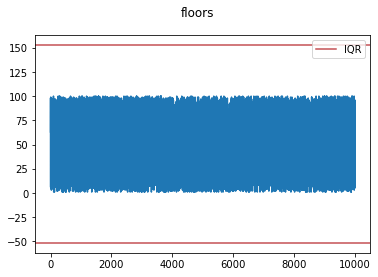

(array([], dtype=int64),)
Empty DataFrame
Columns: [squareMeters, numberOfRooms, floors, cityCode, cityPartRange, numPrevOwners, made, isNewBuilt, hasStormProtector, hasStorageRoom, hasGuestRoom, category, PoolAndYard]
Index: []
-------------------------------------------------


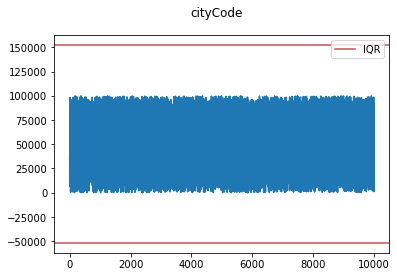

(array([], dtype=int64),)
Empty DataFrame
Columns: [squareMeters, numberOfRooms, floors, cityCode, cityPartRange, numPrevOwners, made, isNewBuilt, hasStormProtector, hasStorageRoom, hasGuestRoom, category, PoolAndYard]
Index: []
-------------------------------------------------


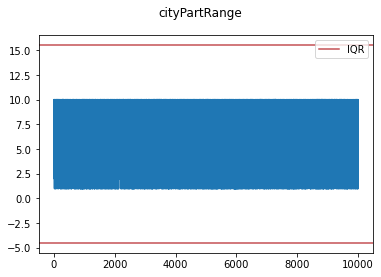

(array([], dtype=int64),)
Empty DataFrame
Columns: [squareMeters, numberOfRooms, floors, cityCode, cityPartRange, numPrevOwners, made, isNewBuilt, hasStormProtector, hasStorageRoom, hasGuestRoom, category, PoolAndYard]
Index: []
-------------------------------------------------


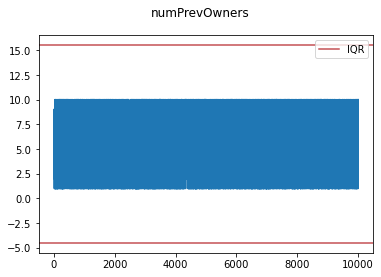

(array([], dtype=int64),)
Empty DataFrame
Columns: [squareMeters, numberOfRooms, floors, cityCode, cityPartRange, numPrevOwners, made, isNewBuilt, hasStormProtector, hasStorageRoom, hasGuestRoom, category, PoolAndYard]
Index: []
-------------------------------------------------


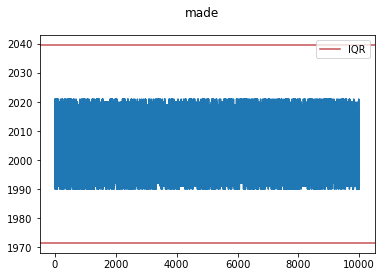

(array([], dtype=int64),)
Empty DataFrame
Columns: [squareMeters, numberOfRooms, floors, cityCode, cityPartRange, numPrevOwners, made, isNewBuilt, hasStormProtector, hasStorageRoom, hasGuestRoom, category, PoolAndYard]
Index: []
-------------------------------------------------


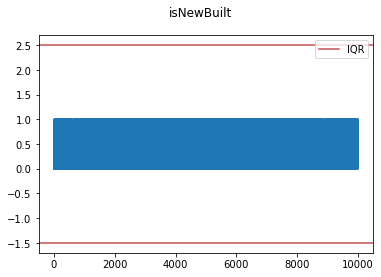

(array([], dtype=int64),)
Empty DataFrame
Columns: [squareMeters, numberOfRooms, floors, cityCode, cityPartRange, numPrevOwners, made, isNewBuilt, hasStormProtector, hasStorageRoom, hasGuestRoom, category, PoolAndYard]
Index: []
-------------------------------------------------


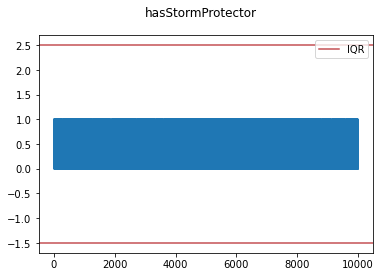

(array([], dtype=int64),)
Empty DataFrame
Columns: [squareMeters, numberOfRooms, floors, cityCode, cityPartRange, numPrevOwners, made, isNewBuilt, hasStormProtector, hasStorageRoom, hasGuestRoom, category, PoolAndYard]
Index: []
-------------------------------------------------


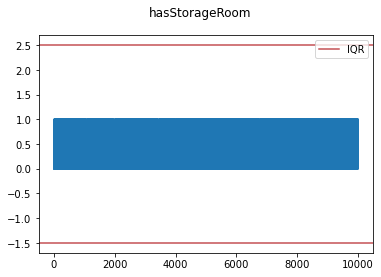

(array([], dtype=int64),)
Empty DataFrame
Columns: [squareMeters, numberOfRooms, floors, cityCode, cityPartRange, numPrevOwners, made, isNewBuilt, hasStormProtector, hasStorageRoom, hasGuestRoom, category, PoolAndYard]
Index: []
-------------------------------------------------


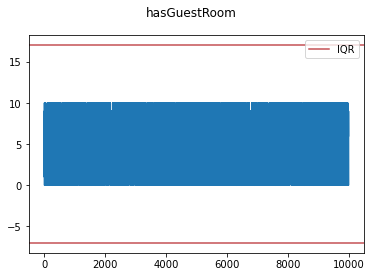

(array([], dtype=int64),)
Empty DataFrame
Columns: [squareMeters, numberOfRooms, floors, cityCode, cityPartRange, numPrevOwners, made, isNewBuilt, hasStormProtector, hasStorageRoom, hasGuestRoom, category, PoolAndYard]
Index: []
-------------------------------------------------


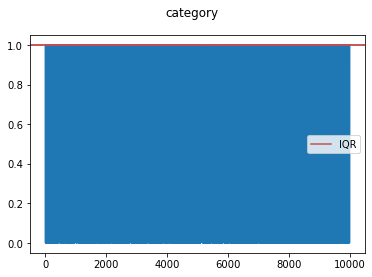

(array([   1,    4,    6, ..., 9973, 9986, 9988], dtype=int64),)
      squareMeters  numberOfRooms  floors  cityCode  cityPartRange  \
1            80771             39      98     39381              8   
4            70429             19      90     38045              3   
6            58682             10      99      6450             10   
17           99371             31      16     96297              7   
19           41792             43      10     80768              9   
...            ...            ...     ...       ...            ...   
9946         89549             60      95      1965              2   
9947         98554             81      18     85908              9   
9973         14982             64      13     96468              7   
9986         26907             65      43      3916              8   
9988          2475             47      37     11367              9   

      numPrevOwners  made  isNewBuilt  hasStormProtector  hasStorageRoom  \
1                 

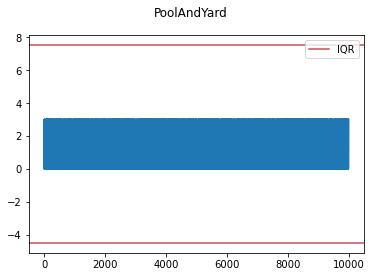

(array([], dtype=int64),)
Empty DataFrame
Columns: [squareMeters, numberOfRooms, floors, cityCode, cityPartRange, numPrevOwners, made, isNewBuilt, hasStormProtector, hasStorageRoom, hasGuestRoom, category, PoolAndYard]
Index: []
-------------------------------------------------


In [17]:
for i in list(dataset[2:]):
    feature = dataset[i]
    q1, q3 = np.percentile(feature, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    plt.figure()
    plt.suptitle(i)
    plt.plot(feature)
    plt.axhline(y=lower_bound, color='r', linestyle='-', label = "IQR")
    plt.axhline(y=upper_bound, color='r', linestyle='-')
    plt.legend()
    plt.show()
        
    outliers = np.where((feature > upper_bound) | (feature < lower_bound))
    
    print(outliers)
    print(dataset.iloc[outliers[0]])
    print("-------------------------------------------------")

# Additional functions

In [18]:
def printClustersPCA(dataset_, model_, labels_):
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dataset_.iloc[:, 0], dataset_.iloc[:, 1], dataset_.iloc[:, 2], 
            c=labels_, cmap='viridis',
            edgecolor='k', s=40, alpha = 0.5)


    ax.set_title("First three PCA directions")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Feature 3")
    ax.dist = 10

    ax.scatter(model_.cluster_centers_[:,0], model_.cluster_centers_[:,1], 
           model_.cluster_centers_[:,2], 
           s = 300, c = 'r', marker='*', label = 'Centroid')

    plt.autoscale(enable=True, axis='x', tight=True)    

    plt.show()

In [19]:
def printClusters(dataset_, labels_, indices_=[0, 1, 2]):
    plt.figure(figsize = (12, 12))
    ax = plt.axes(projection='3d')
    for cluster in set(labels_):
        cluster_mask = [elem == cluster for elem in labels_]
        
        zdata = dataset_.iloc[cluster_mask, indices_[0]]
        xdata = dataset_.iloc[cluster_mask, indices_[1]]
        ydata = dataset_.iloc[cluster_mask, indices_[2]]
        ax.scatter3D(xdata, ydata, zdata)
        
        ax.set_xlabel(dataset_.columns[indices_[0]])
        ax.set_ylabel(dataset_.columns[indices_[1]])
        ax.set_zlabel(dataset_.columns[indices_[2]])

In [20]:
def printDataByClusters(dataset_, labels_):
    dataset_copy = dataset_.copy()
    dataset_copy['label'] = labels_

    df_mean = (dataset_copy.groupby('label').mean())
    results = pd.DataFrame(columns=['Variable', 'Var'])

    for column in df_mean.columns:
        results.loc[len(results), :] = [column, np.var(df_mean[column])]
        selected_columns = list(results.sort_values('Var', ascending=False).head(10).Variable.values)
    
    selected1 = []
    selected2 = []
    
    for col in selected_columns:
        if dataset[col].max() > 1000:
            selected1.append(col)
        else:
            selected2.append(col)
    
    selected1.append("label")
    selected2.append("label")
    
    tidy1 = dataset_copy[selected1].melt(id_vars='label')
    tidy2 = dataset_copy[selected2].melt(id_vars='label')
    
    fig, axs = plt.subplots(1, 2, figsize=(18, 7), squeeze=False)
    sn.barplot(x='label', y='value', hue='variable', data=tidy1, ax = axs[0][0])
    sn.barplot(x='label', y='value', hue='variable', data=tidy2, ax = axs[0][1])
    plt.tight_layout()    
    plt.show()


# Algorithms

### Elbow method for determining the number of clusters

4


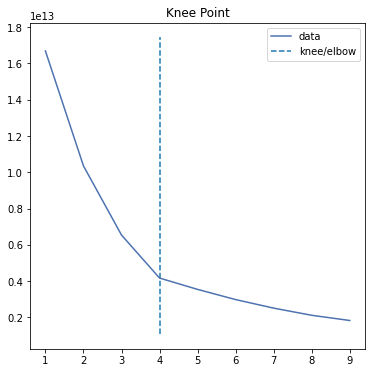

In [21]:
#elbow algorithm
distortions = []

for k in range(1, 10):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dataset)
    distortions.append(kmeanModel.inertia_)

kl = KneeLocator(range(1, 10), distortions, curve="convex", direction="decreasing")
num_clusters = kl.elbow
print(num_clusters)
kl.plot_knee()

## KMeans

In [22]:
km_model = KMeans(n_clusters=num_clusters, random_state=10, algorithm="full")
km_labels = km_model.fit_predict(dataset)

print(km_labels)
print("Silhouette score: ", silhouette_score(dataset, km_labels))
print("Davies-Bouldin score: ", davies_bouldin_score(dataset, km_labels))

[2 2 2 ... 0 0 1]
Silhouette score:  0.40622398958638917
Davies-Bouldin score:  0.7718968895097316


In [23]:
dataset.columns

Index(['squareMeters', 'numberOfRooms', 'floors', 'cityCode', 'cityPartRange',
       'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector',
       'hasStorageRoom', 'hasGuestRoom', 'category', 'PoolAndYard'],
      dtype='object')

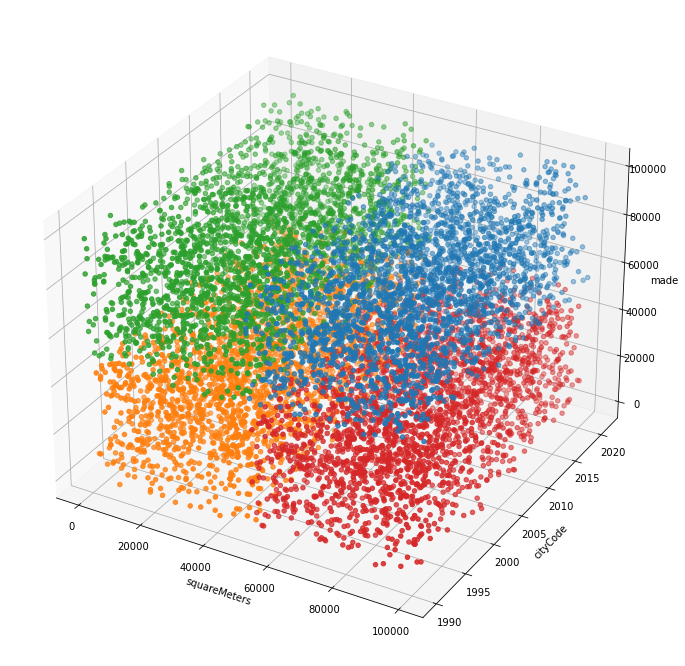

In [24]:
printClusters(dataset, km_labels, [0, 3, 6])

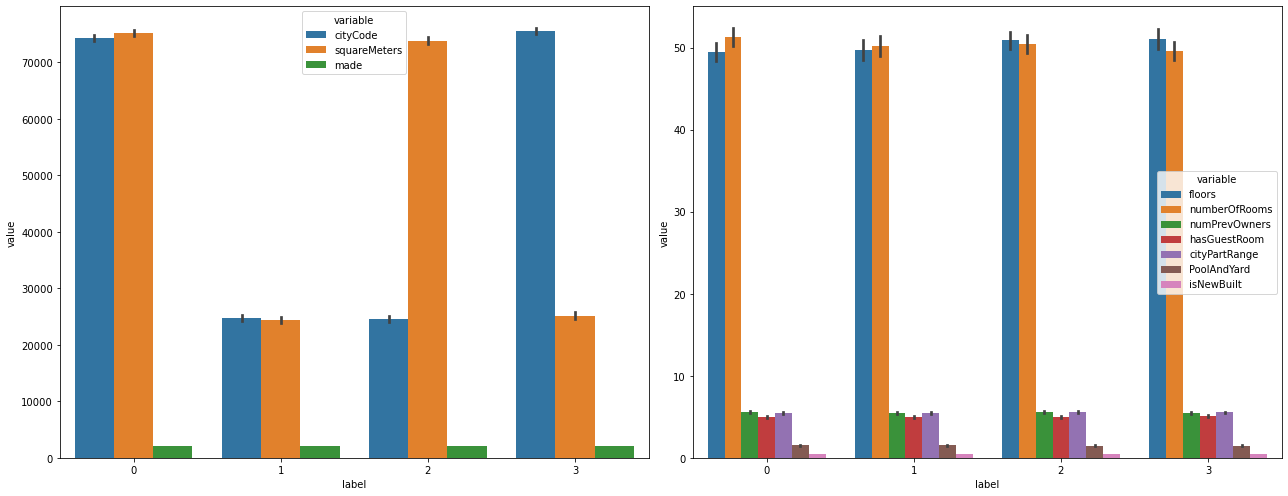

In [25]:
printDataByClusters(dataset, km_labels)

### PCA

4


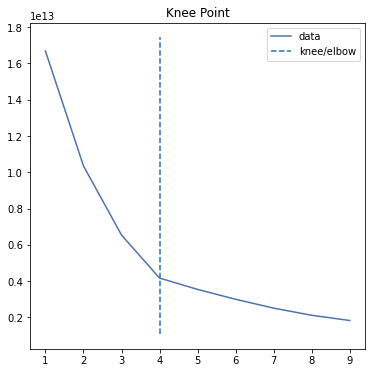

In [26]:
pca = PCA(n_components=3)
PCA_components = pca.fit_transform(dataset)
principalComponents = pd.DataFrame(PCA_components)

distortions = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1, 10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(principalComponents)
    
    # Append the inertia to the list of inertias
    distortions.append(model.inertia_)

kl = KneeLocator(range(1, 10), distortions, curve="convex", direction="decreasing")
num_clusters_pca = kl.elbow
print(num_clusters_pca)
kl.plot_knee()

[0 0 0 ... 3 3 2]
Silhouette score:  0.4062198910420704
Davies-Bouldin score:  0.7718620944302692


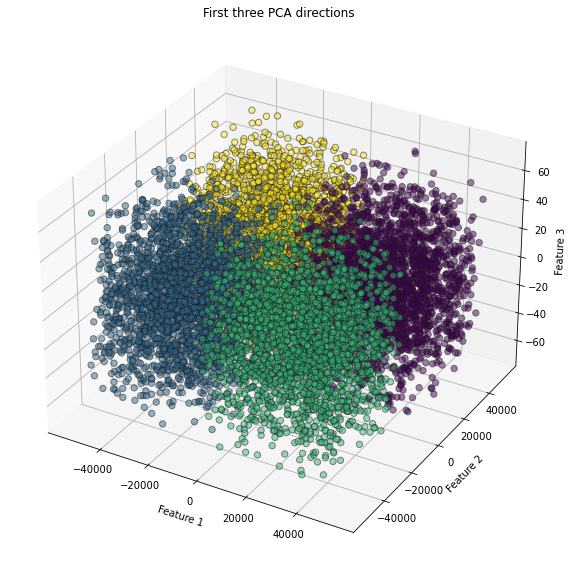

In [27]:
km_pca_model = KMeans(n_clusters=num_clusters_pca)
km_pca_labels = km_pca_model.fit_predict(principalComponents)

print(km_pca_labels)
print("Silhouette score: ", silhouette_score(principalComponents, km_pca_labels))
print("Davies-Bouldin score: ", davies_bouldin_score(principalComponents, km_pca_labels))

printClustersPCA(principalComponents, km_pca_model, km_pca_labels)

## Agglomerative clustering

In [28]:
best_score = 0.0
best_ac_labels = None

for k in range(2, 8):
    ac_model = AgglomerativeClustering(n_clusters=k, compute_distances=True)
    ac_labels = ac_model.fit_predict(dataset)
    
    sil_score = silhouette_score(dataset, ac_labels)
    
    if (sil_score > best_score):
        best_score = sil_score
        best_ac_labels = ac_labels
    
    print("Clusters: ", k)
    print(ac_labels)
    print("Silhouette score: ", silhouette_score(dataset, ac_labels))
    print("Davies-Bouldin score: ", davies_bouldin_score(dataset, ac_labels))
    print("------------------------------------------")

Clusters:  2
[1 1 1 ... 1 1 0]
Silhouette score:  0.3239771187416574
Davies-Bouldin score:  1.2648511276487853
------------------------------------------
Clusters:  3
[0 0 0 ... 0 0 2]
Silhouette score:  0.33369761739791604
Davies-Bouldin score:  0.904232648663978
------------------------------------------
Clusters:  4
[0 0 0 ... 3 0 2]
Silhouette score:  0.37708406995656585
Davies-Bouldin score:  0.8214996999327764
------------------------------------------
Clusters:  5
[3 3 4 ... 1 4 2]
Silhouette score:  0.35736904127768204
Davies-Bouldin score:  0.8731059506118823
------------------------------------------
Clusters:  6
[3 3 4 ... 1 4 0]
Silhouette score:  0.3208728667612624
Davies-Bouldin score:  0.9986581575545195
------------------------------------------
Clusters:  7
[1 1 4 ... 0 4 3]
Silhouette score:  0.3098845039931996
Davies-Bouldin score:  0.9735479786506545
------------------------------------------


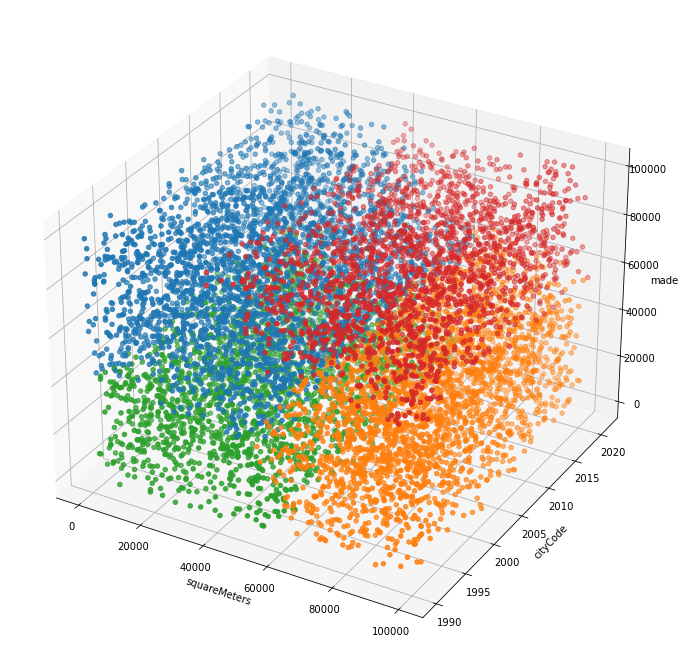

In [29]:
   printClusters(dataset, best_ac_labels, [0, 3, 6])

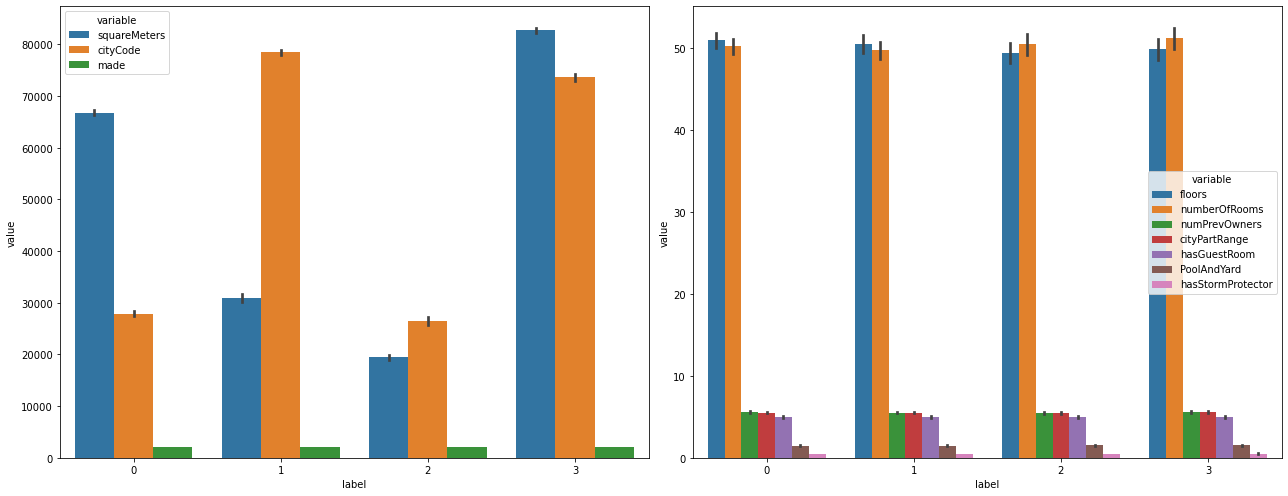

In [30]:
printDataByClusters(dataset, best_ac_labels)

### PCA

In [31]:
pca = PCA(n_components=3)
PCA_components = pca.fit_transform(dataset)
principalComponents = pd.DataFrame(PCA_components)

best_score = 0.0
best_ac_pca_labels = None

for k in range(2, 8):
    ac_pca_model = AgglomerativeClustering(n_clusters=k)
    ac_pca_labels = ac_pca_model.fit_predict(principalComponents)

    sil_score = silhouette_score(dataset, ac_pca_labels)
    
    if (sil_score > best_score):
        best_score = sil_score
        best_ac_pca_labels = ac_pca_labels
    
    print("Clusters: ", k)
    print(ac_pca_labels)
    print("Silhouette score: ", silhouette_score(principalComponents, ac_pca_labels))
    print("Davies-Bouldin score: ", davies_bouldin_score(principalComponents, ac_pca_labels))
    print("------------------------------------------")

Clusters:  2
[1 1 1 ... 0 0 1]
Silhouette score:  0.3455268054888615
Davies-Bouldin score:  1.1899657387082452
------------------------------------------
Clusters:  3
[0 0 0 ... 1 1 0]
Silhouette score:  0.34790446363988176
Davies-Bouldin score:  0.892487091152734
------------------------------------------
Clusters:  4
[1 1 1 ... 0 0 3]
Silhouette score:  0.3627176012682674
Davies-Bouldin score:  0.8459190162223518
------------------------------------------
Clusters:  5
[0 0 0 ... 1 4 3]
Silhouette score:  0.3361568882221112
Davies-Bouldin score:  0.9415460236656827
------------------------------------------
Clusters:  6
[5 5 2 ... 1 4 3]
Silhouette score:  0.3113804964017191
Davies-Bouldin score:  1.02357056125406
------------------------------------------
Clusters:  7
[5 5 2 ... 0 1 3]
Silhouette score:  0.2931301944086091
Davies-Bouldin score:  0.9829894972963472
------------------------------------------


## DBScan

In [32]:
for eps in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    for min_samples in range(1, 25):
        db = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
        y = db.fit_predict(dataset)
        if len(set(db.labels_))>1 and len(set(db.labels_))<249:
            print (str(eps) + " " + str(min_samples) + ": "+ str(silhouette_score(dataset, db.labels_, metric='euclidean')))

14 2: 0.08170238897576092
15 2: 0.08170238897576092


## Gaussian Mixture Models

n clusters:  2
[0 0 0 ... 1 1 0]
Silhouette score:  0.35734308569215584
Davies-Bouldin score:  1.1730196223676748
------------------------------------------
n clusters:  3
[1 1 1 ... 2 2 1]
Silhouette score:  0.37324009244293566
Davies-Bouldin score:  0.8533098024533815
------------------------------------------
n clusters:  4
[2 2 2 ... 0 0 1]
Silhouette score:  0.4061579365414369
Davies-Bouldin score:  0.7719964215551691
------------------------------------------
n clusters:  5
[0 0 0 ... 4 2 3]
Silhouette score:  0.37474180235556515
Davies-Bouldin score:  0.8793739977895896
------------------------------------------
n clusters:  6
[5 2 2 ... 0 2 1]
Silhouette score:  0.3562295644162861
Davies-Bouldin score:  0.8642501911481015
------------------------------------------
n clusters:  7
[0 4 3 ... 2 3 5]
Silhouette score:  0.35894947055810755
Davies-Bouldin score:  0.802889908806537
------------------------------------------
n clusters:  8
[1 6 4 ... 3 6 2]
Silhouette score:  0.3663968

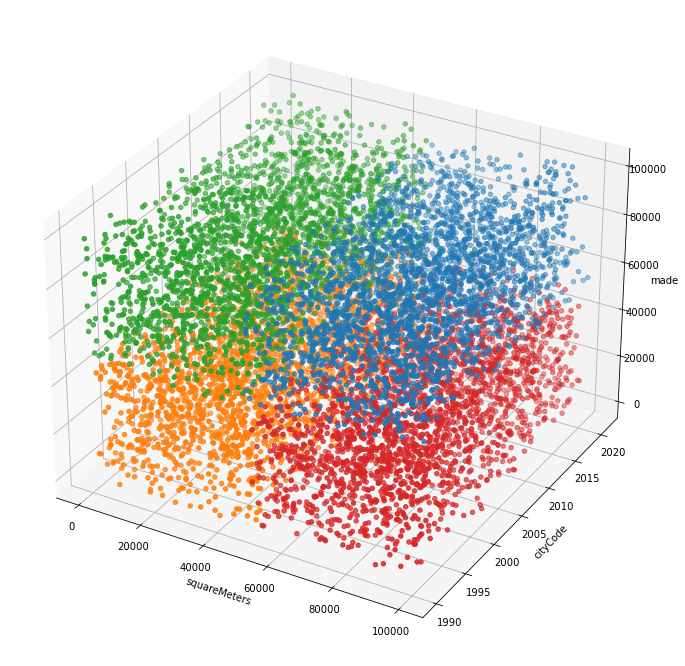

In [33]:
from sklearn import mixture

best_score = 0.0
best_gm_labels = None

for k in range(2, 9):
    gm_model =  mixture.GaussianMixture(n_components=k, covariance_type='spherical').fit(dataset)
    gm_labels = gm_model.fit_predict(dataset)

    sil_score = silhouette_score(dataset, gm_labels)
    
    if (sil_score > best_score):
        best_score = sil_score
        best_gm_labels = gm_labels
    
    print("n clusters: ", k)
    print(gm_labels)
    print("Silhouette score: ", sil_score)
    print("Davies-Bouldin score: ", davies_bouldin_score(dataset, gm_labels))
    print("------------------------------------------")

printClusters(dataset, best_gm_labels, [0, 3, 6])

### PCA

n clusters:  2
[1 1 1 ... 1 1 0]
Silhouette score:  0.35017627373971333
Davies-Bouldin score:  1.198745940002009
------------------------------------------
n clusters:  3
[2 2 2 ... 0 2 2]
Silhouette score:  0.3639067009164835
Davies-Bouldin score:  0.8510313547269691
------------------------------------------
n clusters:  4
[3 3 3 ... 0 0 1]
Silhouette score:  0.40619076047217634
Davies-Bouldin score:  0.7720516844815277
------------------------------------------
n clusters:  5
[4 4 1 ... 0 1 3]
Silhouette score:  0.36130180226932024
Davies-Bouldin score:  0.7970797672463961
------------------------------------------
n clusters:  6
[3 3 5 ... 2 4 0]
Silhouette score:  0.34796655217689093
Davies-Bouldin score:  0.9629305922072359
------------------------------------------
n clusters:  7
[3 3 4 ... 0 4 1]
Silhouette score:  0.35280050168210886
Davies-Bouldin score:  0.7954123817891665
------------------------------------------
n clusters:  8
[0 6 3 ... 7 6 5]
Silhouette score:  0.360209

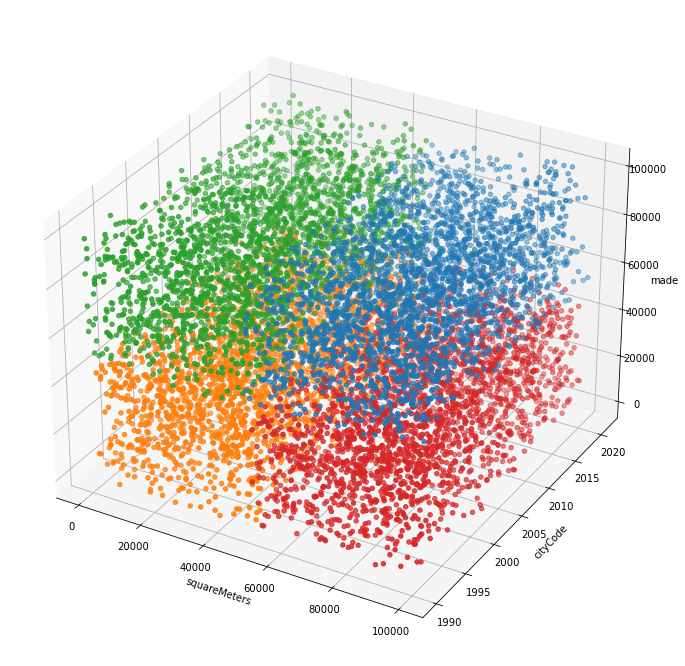

In [34]:
pca = PCA(n_components=3)
PCA_components = pca.fit_transform(dataset)
principalComponents = pd.DataFrame(PCA_components)

best_score = 0.0
best_gm_pca_labels = None

for k in range(2, 10):
    gm_pca_model =  mixture.GaussianMixture(n_components=k, covariance_type='spherical').fit(dataset)
    gm_pca_labels = gm_pca_model.fit_predict(principalComponents)

    sil_score = silhouette_score(principalComponents, gm_pca_labels)
    
    if (sil_score > best_score):
        best_score = sil_score
        best_gm_pca_labels = gm_pca_labels
        
    print("n clusters: ", k)
    print(gm_pca_labels)
    print("Silhouette score: ", sil_score)
    print("Davies-Bouldin score: ", davies_bouldin_score(principalComponents, gm_pca_labels))
    print("------------------------------------------")
    
printClusters(dataset, best_gm_labels, [0, 3, 6])

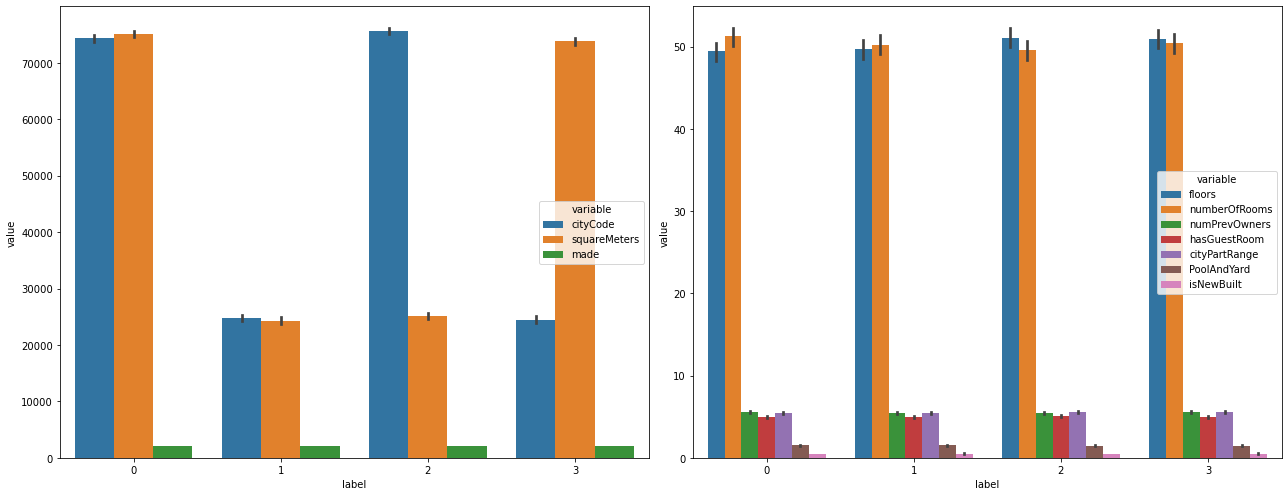

In [35]:
printDataByClusters(dataset, best_gm_pca_labels)